# Parallel Scientific Computing II

## Quadratic Forms and Steepest Descent

    
#### Anne Reinarz

# Families of Iterative Solvers

### relaxation methods:
- Jacobi-, Gauss-Seidel-Relaxation, $\dots$
- Over-Relaxation-Methods


### Multilevel/Multigrid methods

### Krylov methods: 
- Steepest Descent, Conjugate Gradient, \dots
- GMRES, $\dots$

### Domain Decomposition, $\dots$

# Part I
## Quadratic Forms

# Quadratic Forms

## A quadratic form is a scalar, quadratic function of a vector of the form:
## $f (x) = \frac{1}{2} x^T Ax − b^T x + c,$ where $A = A^T$

![quad](quad.png)

# Quadratic Forms

- The gradient of a quadratic form is defined as $$ f^\prime(x) = \left( \begin{array}{c}                       \frac{\partial}{\partial x_1} f(x) \\                       \vdots \\                       \frac{\partial}{\partial x_n} f(x) \\                   \end{array} \right)$$

- apply to $f(x) = \frac{1}{2} x^T A x - b^T x + c$, then
- $f^\prime(x) = Ax - b$
- $f^\prime(x) = 0 \quad\Leftrightarrow\quad Ax - b = 0 
         \quad\Leftrightarrow\quad Ax = b$


####  $\Rightarrow$ $Ax = b$ equivalent to a minimisation problem
####  $\Rightarrow$ proper minimum only if $A$ positive definite

# Direction of Steepest Descent

- gradient $f^\prime(x)$: direction of steepest ascent
- $f^\prime(x) = Ax - b = -r$ 
    - (with residual $r = b-Ax$)
- residual $r$: direction of steepest descent

In [3]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.sparse import diags
from ipywidgets import interact, FloatSlider, IntSlider
from IPython.display import display, clear_output

fig, ax = plt.subplots()
plt.close(fig)

N=2
h=0.25

dat = np.linspace(-20,20,100); x, y = np.meshgrid(dat,dat); xv = np.array([x.reshape(-1), y.reshape(-1)]).T

diagonals = [-np.ones(N-1), 2*np.ones(N), -np.ones(N-1)]
A = diags(diagonals, [-1, 0, 1]).toarray() #Poisson matrix
b = np.matlib.rand(N,1)                   # random right hand side


# Direction of Steepest Descent

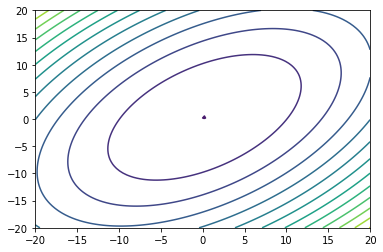

In [4]:
def f(x):
    return np.dot(np.dot(x.T,A),x) - np.dot(b.T,x)

h = np.array([f(xval) for xval in xv ]).reshape(100,100)
plt.contour(x, y, h,15);

# Direction of Steepest Descent

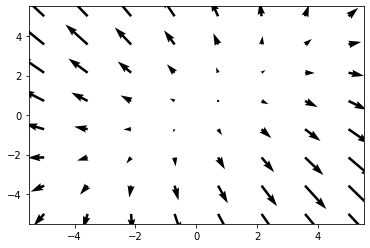

In [5]:
def derivative_f(x): # derivative
    return np.dot(A,x.T) - b.T

dat = np.linspace(-5,5,8); x, y = np.meshgrid(dat,dat); xv = np.array([x.reshape(-1), y.reshape(-1)]).T
u = np.array([derivative_f(xval) for xval in xv ])[:,:,0]
v = np.array([derivative_f(xval) for xval in xv ])[:,:,1]
plt.quiver(x,y, u,v);

# Solving linear systems via Minimum Search

- basic idea to find minimum: move into direction of steepest descent
- most simple scheme: $$x^{(i+1)} = x^{(i)} + \alpha r^{(i)}$$
- $\alpha$ constant $\rightarrow$ Richardson iteration (usually considered as a relaxation method)
- better choice of $\alpha$: move to lowest point in that direction
     - Steepest Descent

# Steepest Descent – find an optimal $\alpha$

- task: line search along the line:         $$x^{(1)} = x^{(0)} + \alpha r^{(0)}$$
- choose $\alpha$ such that  $f( x^{(1)} )$ is minimal: $$\frac{\partial}{\partial\alpha} f (x^{(1)}) = 0$$
- use chain rule: $$ \frac{\partial}{\partial\alpha} f (x^{(1)})  = f^\prime (x^{(1)})^{\!T} \frac{\partial}{\partial\alpha} x^{(1)}           = f^\prime (x^{(1)})^{\!T} r^{(0)}$$
- remember $f^\prime (x^{(1)}) = -r^{(1)}$, thus: $             - \left( r^{(1)} \right)^{\!T} r^{(0)} \stackrel{!}{=} 0 $         hence, $f^\prime (x^{(1)}) = -r^{(1)}$ should be orthogonal to $r^{(0)}$

# Steepest Descent -- find an optimal $\alpha$

$$ \left( r^{(1)} \right)^{\!T} r^{(0)}        = \left( b - A x^{(1)} \right)^{\!T} r^{(0)} = 0 $$
$$ \left( b - A ( x^{(0)} + \alpha r^{(0)} ) \right)^{\!T} r^{(0)} = 0 $$
$$ \left( b - A x^{(0)} \right)^{\!T} r^{(0)} - \alpha \left( A r^{(0)} \right)^{\!T} r^{(0)} = 0 $$
$$ \left( r^{(0)} \right)^{\!T} r^{(0)} - \alpha \left( r^{(0)} \right)^{\!T} A r^{(0)} = 0 $$
  
- Solve for $\alpha$: $$       \alpha  = \frac{ \left( r^{(0)} \right)^{\!T} r^{(0)} }{ \left( r^{(0)} \right)^{\!T} A r^{(0)} }$$

# Steepest Descent -- Algorithm

1. $ r^{(i)} = b - A x^{(i)} $
2. $ \displaystyle \alpha_i = \frac{ \left( r^{(i)} \right)^{\!T} r^{(i)} }  { \left( r^{(i)} \right)^{\!T} A r^{(i)} } $
3. $ x^{(i+1)} = x^{(i)} + \alpha_i r^{(i)}$

# Steepest Descent

In [9]:
A[0,0] = 0.5; A[1,0]=0.0;A[0,1]=0.0; A[1,1]=2.5;b[0]=0.0;b[1]=0.0

ax.clear()
dat = np.linspace(-2.1,2.1,100); x, y = np.meshgrid(dat,dat); xv = np.array([x.reshape(-1), y.reshape(-1)]).T    
h = np.array([f(xval) for xval in xv]).reshape(100,100);

In [10]:
def steepest_descent(num_it):
    x = np.array([2.0, 2./5.]).reshape(-1,1) # initial guess
    steps = x
    for i in range(0,num_it):
        r = b - np.dot(A,x).reshape(-1,1)             # compute residual
        alpha = np.dot(r.T,r)/np.dot(r.T,np.dot(A,r)) # compute step size
        x = x + np.multiply(alpha,r) # update
        steps = np.vstack((steps, x))
    return np.array(steps).reshape(num_it+1,2)

# Steepest Descent

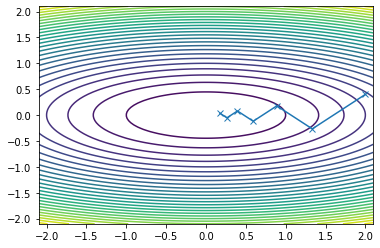

In [11]:
plt.contour(x, y, h, 30);
steps = steepest_descent(6)
plt.plot(steps.T[0], steps.T[1], "x-");

# Steepest Descent -- Observations:

- slow convergence (similar to Jacobi relaxation)
- detailed analysis reveals: $$ \left\| e^{(i)} \right\|_A \le           \left( \frac{ \kappa -1 }{ \kappa + 1 } \right)^i          \left\| e^{(0)} \right\|_A$$
- with condition number $\kappa = \lambda_{\text{max}} / \lambda_{\text{min}} $ 
    - largest/smallest eigenvalues of $A$; for positive definite $A$
- many steps in the same direction